# **1**


In [13]:
import numpy as np #библиотека, которая поддерживает многомерные массивы и математические функции
from sklearn import datasets #Sklearn - библиотека для машинного обучения, datasets - модуль, который содержит наборы данных (мы с ними будем работать)
import pandas as pd #библиотека для анализа данных
import matplotlib.pyplot as plt #модуль в библиотеке matplotlip, который позволяет создавать графики и визуализировать данные в python 3
from sklearn.neighbors import KNeighborsClassifier #импортируем классификатор  k ближайших соседей
from sklearn.model_selection import train_test_split # импортируем из библиотеки  sklearn функцию train_test_split

In [14]:
from collections import Counter # класс Counter предоставляет удобный способ подсчета элементов в объектах (кортежи, строки, списки)

class KNN:
    def __init__(self, n_neighbors=3, metric="euclidean"):
      # Конструктор класса, который используется для инициализации объектов, создаваемых из класса.
      # Параметры - количество соседей и метрика для измерения расстояния между двумя точками
        self.n_neighbors = n_neighbors
        self.metric = metric
        self.p = 2
    # Метод fit() в машинном обучении используется для обучения моделей машинного обучения на данных. Принимает в качестве параметров обучающие данные(признаки)
    # и соответствующиеим целевые значения(метки)
    def fit(self, X, y):
      #Метод для создания базы точек. Параметры: Х - массив данных тренироввочной части и у - массив меток тренировочной части
        self.X_train = X
        self.y_train = y

    def calculate_distances(self, x1, x2):
      # Внутренний метод для вычисления расстояний по определенной метрике
      # В качестве параметра берутся x1 и x2 - точки, между оторыми нужно вычислить расстояние
      # Метод возвращает переменную distance - массив расстояний между X и всеми точками тренировочной части
      if self.metric == "minkowski":
        return np.sum(np.abs(x1-x2) ** self.p) ** (1/self.p)
      if self.metric == 'chebyshev':
        # Значение параметра p по формуле равно бесконечности, поэтому его нет в вычислениях
        return np.max(np.abs(x1-x2))
      if self.metric == 'manhattan':
        # Значение параметра p по формуле равно 1, поэтому его нет в вычислениях
        return np.sum(np.abs(x1-x2))

    # Метод predict() в машинном обучении на Python используется для выполнения прогнозов (предсказаний) на основе обученной модели.
    # Этот метод позволяет модели использовать новые или ранее не виденные данные для вычисления соответствующих выходных значений или классификаций.

    # В нашей задаче метод __predict(self, x) принимает в качестве параметра точку х, считает расстояние между точкой х и всеми точками обучающего набора Х_train.
    # Далее в  помощью метода argsort() находит индексы k наименьших расстояний и извлекает метки классов соответствующих точек.
    # С помощью Counter подсчитывает наиболее частовстречающийся класс среди k соседей. Метод возращает класс в виде переменной most_common (предсказание для точки х)
    def __predict(self, x):
        # Рассчитываем расстояния между x и всеми точками в обучающем наборе
        distances = [self.calculate_distances(x, x_train) for x_train in self.X_train]
        # Сортируем индексы точек в порядке возрастания расстояний
        # Получаем метки классов для k ближайших соседей
        k_nearest_targets = [self.y_train[i] for i in np.argsort(distances)[:self.n_neighbors]]
        # Находим наиболее часто встречающийся класс среди соседей.
        # most_common(1) показывает самые частовстречающиеся пары (элемент, количество)
        most_common = Counter(k_nearest_targets).most_common(1)
        # Возвращаем наиболее часто встречающиийся класс, где
        # первый элемент каждого кортежа - это метка класса, а
        # второй элемент - количество раз, которое этот класс встречается среди соседей.
        return most_common[0][0]

    # Метод predict() принимает в качестве параметра набор тестовых точек X_test и для каждой точки вызывает метод __predict(x). Результаты предсказаний сохраняются в переменную
    # predictions и возвращаются в виде массива
    def predict(self, X_test):  # Предсказание классов для тестовых данных. Параметр Х_test - матрица тестовых признаков
      #Возвращает: np.array(predictions) - вектор предсказанных классов
        predictions = [self.__predict(x) for x in X_test]
        return np.array(predictions)

    # Метод __predict_proba(х) принимает в качестве параметра точку х, считает расстояния между точкой х и всеми точками обучающего набора Х_train
    # Далее находит с помощью метода np.argsort() индексы k наименьших расстояний и извлекает метки классов соответствуюих точек в список k_nearest_targets.
    # Далее при помощи Counter подсчитывает наиболее частовстречающийся класс среди k соседей (то есть кол-во вхожддений этого класса в список k_nearest_targets).
    # Создаем новый список accuracy, в котором храним элементы - вероятности принадлежности объекта x к классу.
    # Список accuracy возвращается в качестве результата
    def __predict_proba(self, x):
        # Создаем список distances, в котором хранятся расстояния между x и каждой точкой в обучающем наборе.
        distances = [self.calculate_distances(x, x_train) for x_train in self.X_train]
        # Находим индексы точек, которые являются k ближайшими соседями объекта x, и сортируем их в порядке возрастания расстояний
        # Создаем список k_nearest_targets, содержащий метки классов для ближайших соседей объекта x.
        k_nearest_targets = [self.y_train[i] for i in np.argsort(distances)[:self.n_neighbors]]
        # Создаем словарь class_counts, который подсчитывает частотность каждой метки класса среди соседей.
        class_counts = Counter(k_nearest_targets)
        # Создаем список accuracy, в котором содержатся вероятности принадлежности к каждому классу на основе частотности.
        accuracy = [class_counts[class_label] / self.n_neighbors for class_label in np.unique(self.y_train)]
        return accuracy
        #Деление class_counts[class_label] на n_neighbors для каждой уникальной метки класса позволяет вычислить
        #вероятность принадлежности объекта x к каждому классу на основе ближайших соседей.

    # Метод predict_proba(X_test) принимает в качестве параметра набор тестовых точек X_test и для каждой точки вызывает метод __predict_proba(x).
    # Результат (список вероятностей accuracy) с помощью библиотеки numpy преобразуется в массив и возвращается.
    def predict_proba(self, X_test):  # Вероятности классов для тестовых данных.
        probas = [self.__predict_proba(x) for x in X_test]
        return np.array(accuracy)
        #Параметр:  X_test - Матрица тестовых признаков.
        #Возвращает: np.array(accuracy) - матрица вероятностей классов

In [15]:
data_arr = [datasets.load_breast_cancer, datasets.load_iris, datasets.load_wine, datasets.load_digits]
print("Iris plants dataset - Набор данных о растениях ириса\nWine recognition dataset - Набор данных для распознавания вин\nBreast cancer wisconsin (diagnostic) dataset - Набор данных по раку молочной железы в Висконсине (диагностический)\nOptical recognition of handwritten digits dataset - Оптическое распознавание набора данных рукописных цифр")
print ("------------------------------------------------------------------------")
# названия функций датасетов для оптимизационного вывода через цикл
metrics = ["minkowski","chebyshev","manhattan"] # Названия метрик
for dataset in data_arr:                     # Цикл прогона по 4 датасетам
  data = dataset()                              # Присвоение переменной data набор данных определенного датасета

  # атрибут DESCR - это строковая переменная или объект, которая, предположительно, содержит несколько строк текста.
  #.splitlines() - это метод строкового объекта, который разбивает строку на список строк, используя символы новой строки (перевода строки) в качестве разделителя.
  # [2] - это индексация списка, которая выбирает третью строку (от 0, поэтому [2] выберет третий элемент).
  # Результат заносится в переменную dataset_name и выводится
  dataset_name = data.DESCR.splitlines()[2]     # атрибут DESCR содержит описание датасета, которое включает его имя.
  print("Название датасета: ",dataset_name)
  # разделим данные с помощью train_test_split
  X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size = 0.7)
  # train - тренировка, test - проверка; 70% - тренировка (уйдет на обучение машины), оставшиеся 30% - тестирование (проверка результатов обучения машины)
  best_data = ["minkowski",3]               # Массив со значениями по-умолчанию лучших значений в метрике
  best_accuracy = 0                         # Значение точности по-умолчанию
  accuracy_arr = 15*[0]                         # инициализируем массив accuracy_arr точностей попадания в нужный класс
  a = 0                                         # инициализируем переменную а нулевым значением
  for j in metrics:                             # Цикл прогона по 3 метрикам
    print(" Метрика - ",j)                      # Название текущей метрики
    best_n_in_metric = 3                        # Лучшее количество соседей по-умолчанию
    best_accuracy_in_metric = 0             # Лучшая точность в метрике по-умолчанию
    for i in range(3,8):                        # Цикл прогона от 3 до 7 соседей включительно
      knn = KNN(n_neighbors = i,metric = j)
      # Использую встроенный класс k ближайших соседей с заданными числом соседей и метрикой
      knn.fit(X_train,y_train)               # Обучение модели по тренировочным значениям
      # прогнозирование переменной на основе обученной модели машинного обучения
      accuracy = (1-np.sum(np.abs(knn.predict(X_test)-y_test))/y_test.size)*100
      # Определяю точность попадания в нужный класс
      accuracy_arr[a] = accuracy # присваиваем элементам дефолтного массива точности, которыеполучаем при помощи раннее написанной функции predict(X_test)
      a +=1 # увеличиваем индекс, когда прибавляем элемент
      # Ищем лучшую точность (максимальную) и сохраняем точность в метрике и число соседей
      if accuracy > best_accuracy_in_metric:
        best_accuracy_in_metric = accuracy
        best_n_in_metric = i
      # цикл по определению лучших точности и числа соседей в метрике
      print("  Точность при ",i, "соседях: ",round(accuracy,3), "%")
      # Вывод точности при определнных кол-ве соседей и метрике
      # print(logreg.predict_proba(X_test))      # вероятность принадлежности/непринадлежности к опр. классу
    # Ищем лучший результат точности в датасете (наибольшая точность из всех 15 вариантов), метрику в которой встречается первый раз и сколько всего раз встречается эта точность
    if best_accuracy_in_metric > best_accuracy:
      best_accuracy = best_accuracy_in_metric
      best_data[0] = j # Метрика,в которой впервые выявлена лучшая точность
      best_data[1] = best_n_in_metric # кол-во соседей при котором впервые выявлена лучшая точность в метрике the_best_data[0]
    # Цикл по определению лучших точности и числа соседей в датасете
    sum_b = 0
    for b in accuracy_arr:
      if b == best_accuracy:
        sum_b += 1 # кол-во раз, когда встречается лучшая точность
  print(" ")
  print("Вывод: Лучший результат в данном датасете равен ",round(best_accuracy,3),"%. Встречается", sum_b ," раз(а), впервые выявлен при метрике ",best_data[0], " и ",best_data[1], " соседях")
  print("-----------------------------------------------------------------------")

Iris plants dataset - Набор данных о растениях ириса
Wine recognition dataset - Набор данных для распознавания вин
Breast cancer wisconsin (diagnostic) dataset - Набор данных по раку молочной железы в Висконсине (диагностический)
Optical recognition of handwritten digits dataset - Оптическое распознавание набора данных рукописных цифр
------------------------------------------------------------------------
Название датасета:  Breast cancer wisconsin (diagnostic) dataset
 Метрика -  minkowski
  Точность при  3 соседях:  91.813 %
  Точность при  4 соседях:  92.398 %
  Точность при  5 соседях:  92.398 %
  Точность при  6 соседях:  92.398 %
  Точность при  7 соседях:  92.982 %
 Метрика -  chebyshev
  Точность при  3 соседях:  91.228 %
  Точность при  4 соседях:  92.398 %
  Точность при  5 соседях:  92.982 %
  Точность при  6 соседях:  92.982 %
  Точность при  7 соседях:  93.567 %
 Метрика -  manhattan
  Точность при  3 соседях:  92.982 %
  Точность при  4 соседях:  94.152 %
  Точность при 

# **2**

In [9]:
import numpy as np #библиотека, которая поддерживает многомерные массивы и математические функции
from sklearn import datasets #Sklearn - библиотека для машинного обучения, datasets - модуль, который содержит наборы данных (мы с ними будем работать)
import pandas as pd #библиотека для анализа данных
import matplotlib.pyplot as plt #модуль в библиотеке matplotlip, который позволяет создавать графики и визуализировать данные в python 3
from sklearn.neighbors import KNeighborsClassifier #импортируем классификатор  k ближайших соседей
from sklearn.model_selection import train_test_split # импортируем из библиотеки  sklearn функцию train_test_split

In [10]:
data_arr = [datasets.load_breast_cancer, datasets.load_iris, datasets.load_wine, datasets.load_digits]
print("Iris plants dataset - Набор данных о растениях ириса\nWine recognition dataset - Набор данных для распознавания вин\nBreast cancer wisconsin (diagnostic) dataset - Набор данных по раку молочной железы в Висконсине (диагностический)\nOptical recognition of handwritten digits dataset - Оптическое распознавание набора данных рукописных цифр")
print ("------------------------------------------------------------------------")
# названия функций датасетов для оптимизационного вывода через цикл
metrics = ["minkowski","chebyshev","manhattan"] # Названия метрик
for dataset in data_arr:                     # Цикл прогона по 4 датасетам
  data = dataset()                              # Присвоение переменной data набор данных определенного датасета

  # атрибут DESCR - это строковая переменная или объект, которая, предположительно, содержит несколько строк текста.
  #.splitlines() - это метод строкового объекта, который разбивает строку на список строк, используя символы новой строки (перевода строки) в качестве разделителя.
  # [2] - это индексация списка, которая выбирает третью строку (от 0, поэтому [2] выберет третий элемент).
  # Результат заносится в переменную dataset_name и выводится
  dataset_name = data.DESCR.splitlines()[2]     # атрибут DESCR содержит описание датасета, которое включает его имя.
  print("Название датасета: ",dataset_name)
  # разделим данные с помощью train_test_split
  X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size = 0.7)
  # train - тренировка, test - проверка; 70% - тренировка (уйдет на обучение машины), оставшиеся 30% - тестирование (проверка результатов обучения машины)
  best_data = ["minkowski",3]               # Массив со значениями по-умолчанию лучших значений в метрике
  best_accuracy = 0                         # Значение точности по-умолчанию
  accuracy_arr = 15*[0]                         # инициализируем массив accuracy_arr точностей попадания в нужный класс
  a = 0                                         # инициализируем переменную а нулевым значением
  for j in metrics:                             # Цикл прогона по 3 метрикам
    print(" Метрика - ",j)                      # Название текущей метрики
    best_n_in_metric = 3                        # Лучшее количество соседей по-умолчанию
    best_accuracy_in_metric = 0             # Лучшая точность в метрике по-умолчанию
    for i in range(3,8):                        # Цикл прогона от 3 до 7 соседей включительно
      knn = KNeighborsClassifier(n_neighbors = i,metric = j)
      # Использую встроенный в sklearn класс k ближайших соседей с заданными числом соседей и метрикой
      knn.fit(X_train,y_train)               # Обучение модели по тренировочным значениям
      # прогнозирование переменной на основе обученной модели машинного обучения
      accuracy = (1-np.sum(np.abs(knn.predict(X_test)-y_test))/y_test.size)*100
      # Определяю точность попадания в нужный класс
      accuracy_arr[a] = accuracy # присваиваем элементам дефолтного массива точности, которыеполучаем при помощи раннее написанной функции predict(X_test)
      a +=1 # увеличиваем индекс, когда прибавляем элемент
      # Ищем лучшую точность (максимальную) и сохраняем точность в метрике и число соседей
      if accuracy > best_accuracy_in_metric:
        best_accuracy_in_metric = accuracy
        best_n_in_metric = i
      # цикл по определению лучших точности и числа соседей в метрике
      print("  Точность при ",i, "соседях: ",round(accuracy,3), "%")
      # Вывод точности при определнных кол-ве соседей и метрике
      # print(logreg.predict_proba(X_test))      # вероятность принадлежности/непринадлежности к опр. классу
    # Ищем лучший результат точности в датасете (наибольшая точность из всех 15 вариантов), метрику в которой встречается первый раз и сколько всего раз встречается эта точность
    if best_accuracy_in_metric > best_accuracy:
      best_accuracy = best_accuracy_in_metric
      best_data[0] = j # Метрика,в которой впервые выявлена лучшая точность
      best_data[1] = best_n_in_metric # кол-во соседей при котором впервые выявлена лучшая точность в метрике the_best_data[0]
    # Цикл по определению лучших точности и числа соседей в датасете
    sum_b = 0
    for b in accuracy_arr:
      if b == best_accuracy:
        sum_b += 1 # кол-во раз, когда встречается лучшая точность
  print(" ")
  print("Вывод: Лучший результат в данном датасете равен ",round(best_accuracy,3),"%. Встречается", sum_b ," раз(а), впервые выявлен при метрике ",best_data[0], " и ",best_data[1], " соседях")
  print("-----------------------------------------------------------------------")

Iris plants dataset - Набор данных о растениях ириса
Wine recognition dataset - Набор данных для распознавания вин
Breast cancer wisconsin (diagnostic) dataset - Набор данных по раку молочной железы в Висконсине (диагностический)
Optical recognition of handwritten digits dataset - Оптическое распознавание набора данных рукописных цифр
------------------------------------------------------------------------
Название датасета:  Breast cancer wisconsin (diagnostic) dataset
 Метрика -  minkowski
  Точность при  3 соседях:  93.567 %
  Точность при  4 соседях:  94.737 %
  Точность при  5 соседях:  94.737 %
  Точность при  6 соседях:  95.322 %
  Точность при  7 соседях:  92.982 %
 Метрика -  chebyshev
  Точность при  3 соседях:  94.152 %
  Точность при  4 соседях:  94.152 %
  Точность при  5 соседях:  94.152 %
  Точность при  6 соседях:  95.322 %
  Точность при  7 соседях:  93.567 %
 Метрика -  manhattan
  Точность при  3 соседях:  94.737 %
  Точность при  4 соседях:  95.906 %
  Точность при 

Выводы:

# **3**

In [11]:
import numpy as np # библиотека, которая поддерживает многомерные массивы и математические функции
from sklearn import datasets # Sklearn - библиотека для машинного обучения, datasets - модуль, который содержит наборы данных (мы с ними будем работать)
import pandas as pd # библиотека для анализа данных
import matplotlib.pyplot as plt # модуль в библиотеке matplotlip, который позволяет создавать графики и визуализировать данные в python 3
from sklearn.neighbors import KNeighborsClassifier # импортируем классификатор  k ближайших соседей
from sklearn.model_selection import train_test_split # импортируем из библиотеки  sklearn функцию train_test_split
from sklearn.metrics import roc_curve, auc # оценка способности модели к различению между классами в бинарной классификации
from sklearn.metrics import roc_auc_score # вычисление площади под кривой ROC-AUC
from sklearn.datasets import make_classification # позволяет генерировать набор данных с заданными характеристиками
from sklearn.linear_model import LogisticRegression # реализация алгоритма логистической регрессии

Iris plants dataset - Набор данных о растениях ириса
Wine recognition dataset - Набор данных для распознавания вин
Breast cancer wisconsin (diagnostic) dataset - Набор данных по раку молочной железы в Висконсине (диагностический)
Optical recognition of handwritten digits dataset - Оптическое распознавание набора данных рукописных цифр
------------------------------------------------------------------------
Название датасета:  Breast cancer wisconsin (diagnostic) dataset
 Метрика -  minkowski
  Точность при  3 соседях:  92.398 %
  Точность при  4 соседях:  92.982 %
  Точность при  5 соседях:  92.982 %
  Точность при  6 соседях:  92.982 %
  Точность при  7 соседях:  92.398 %
 Метрика -  chebyshev
  Точность при  3 соседях:  90.643 %
  Точность при  4 соседях:  92.398 %
  Точность при  5 соседях:  91.813 %
  Точность при  6 соседях:  93.567 %
  Точность при  7 соседях:  92.398 %
 Метрика -  manhattan
  Точность при  3 соседях:  94.152 %
  Точность при  4 соседях:  93.567 %
  Точность при 

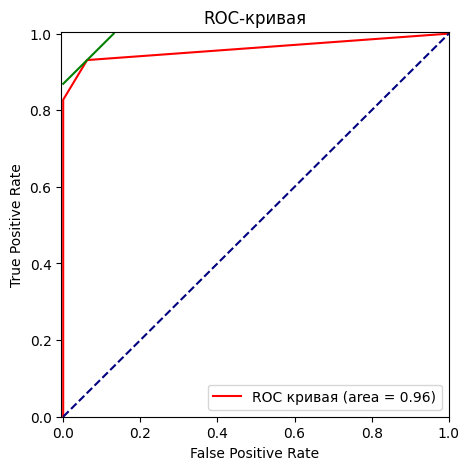

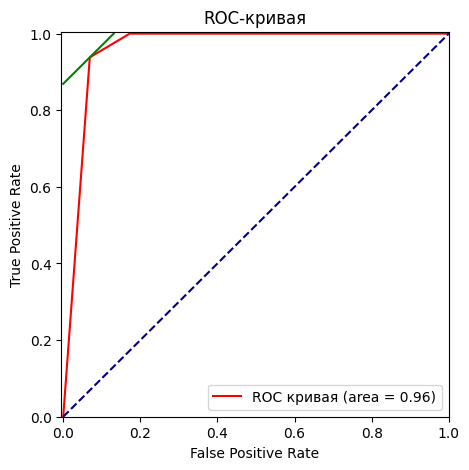

-----------------------------------------------------------------------
Название датасета:  Iris plants dataset
 Метрика -  minkowski
  Точность при  3 соседях:  93.333 %
  Точность при  4 соседях:  95.556 %
  Точность при  5 соседях:  93.333 %
  Точность при  6 соседях:  95.556 %
  Точность при  7 соседях:  95.556 %
 Метрика -  chebyshev
  Точность при  3 соседях:  93.333 %
  Точность при  4 соседях:  93.333 %
  Точность при  5 соседях:  93.333 %
  Точность при  6 соседях:  95.556 %
  Точность при  7 соседях:  93.333 %
 Метрика -  manhattan
  Точность при  3 соседях:  95.556 %
  Точность при  4 соседях:  95.556 %
  Точность при  5 соседях:  95.556 %
  Точность при  6 соседях:  95.556 %
  Точность при  7 соседях:  93.333 %
 
Вывод: Лучший результат в данном датасете равен  95.556 %. Встречается 8  раз(а), впервые выявлен при метрике  minkowski  и  4  соседях
-----------------------------------------------------------------------


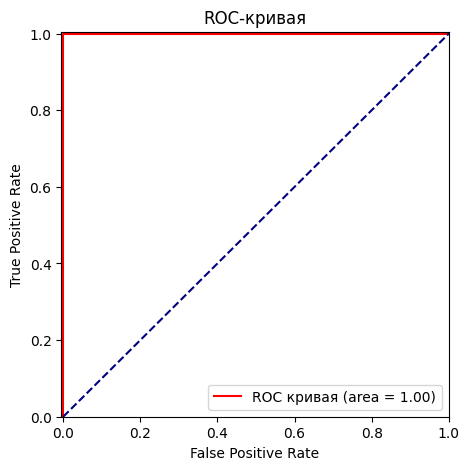

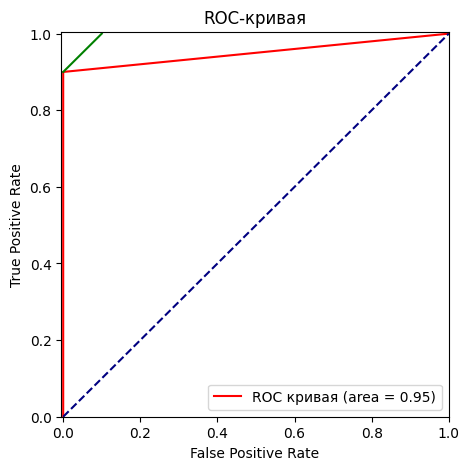

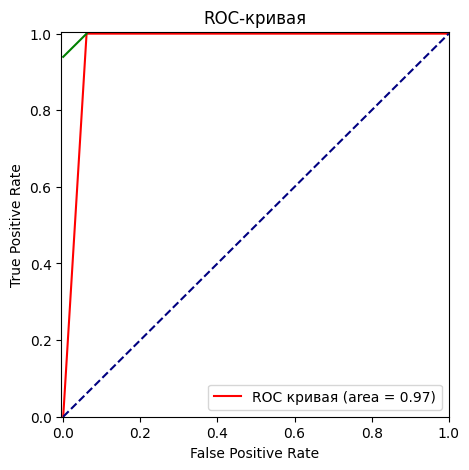

-----------------------------------------------------------------------
Название датасета:  Wine recognition dataset
 Метрика -  minkowski
  Точность при  3 соседях:  83.333 %
  Точность при  4 соседях:  81.481 %
  Точность при  5 соседях:  79.63 %
  Точность при  6 соседях:  81.481 %
  Точность при  7 соседях:  81.481 %
 Метрика -  chebyshev
  Точность при  3 соседях:  79.63 %
  Точность при  4 соседях:  83.333 %
  Точность при  5 соседях:  79.63 %
  Точность при  6 соседях:  75.926 %
  Точность при  7 соседях:  79.63 %
 Метрика -  manhattan
  Точность при  3 соседях:  81.481 %
  Точность при  4 соседях:  83.333 %
  Точность при  5 соседях:  87.037 %
  Точность при  6 соседях:  83.333 %
  Точность при  7 соседях:  88.889 %
 
Вывод: Лучший результат в данном датасете равен  88.889 %. Встречается 1  раз(а), впервые выявлен при метрике  manhattan  и  7  соседях
-----------------------------------------------------------------------


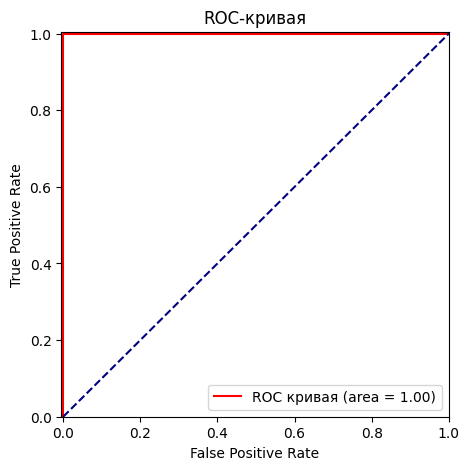

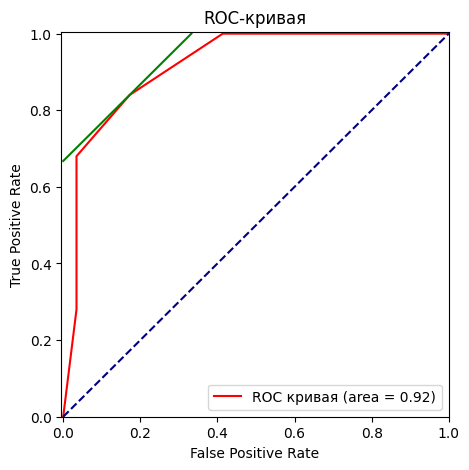

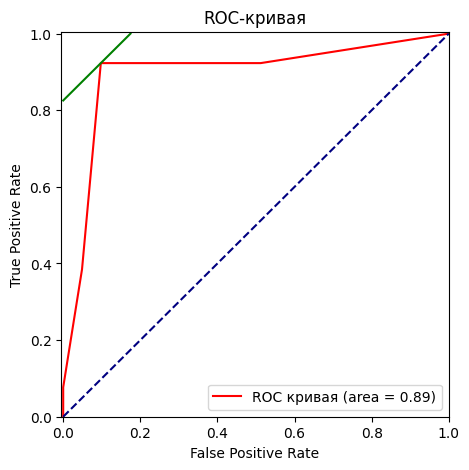

-----------------------------------------------------------------------
Название датасета:  Optical recognition of handwritten digits dataset
 Метрика -  minkowski
  Точность при  3 соседях:  95.0 %
  Точность при  4 соседях:  90.926 %
  Точность при  5 соседях:  93.704 %
  Точность при  6 соседях:  89.074 %
  Точность при  7 соседях:  89.815 %
 Метрика -  chebyshev
  Точность при  3 соседях:  90.556 %
  Точность при  4 соседях:  87.407 %
  Точность при  5 соседях:  88.519 %
  Точность при  6 соседях:  87.222 %
  Точность при  7 соседях:  84.259 %
 Метрика -  manhattan
  Точность при  3 соседях:  91.296 %
  Точность при  4 соседях:  88.148 %
  Точность при  5 соседях:  90.37 %
  Точность при  6 соседях:  89.259 %
  Точность при  7 соседях:  90.0 %
 
Вывод: Лучший результат в данном датасете равен  95.0 %. Встречается 1  раз(а), впервые выявлен при метрике  minkowski  и  3  соседях
-----------------------------------------------------------------------


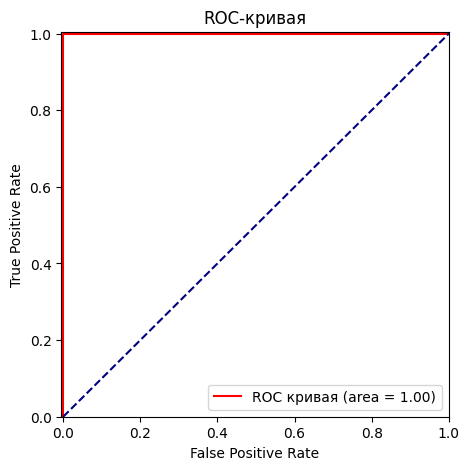

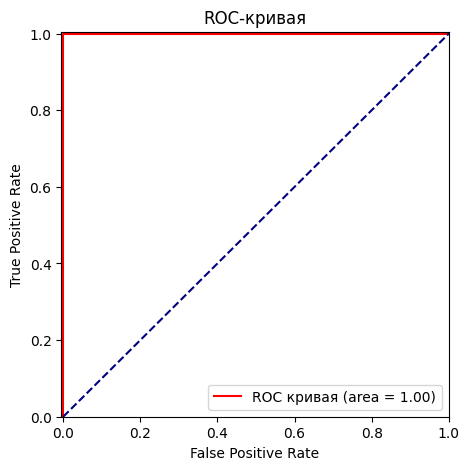

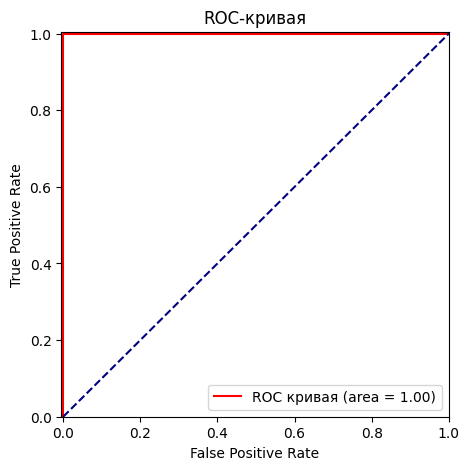

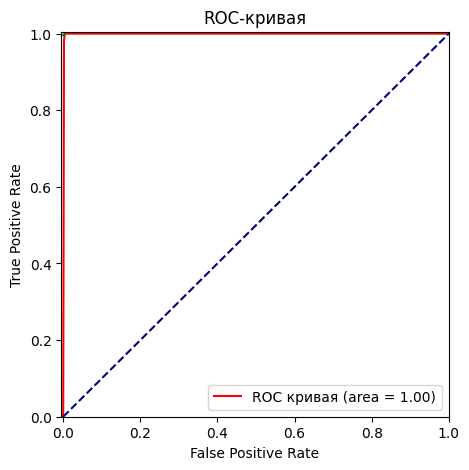

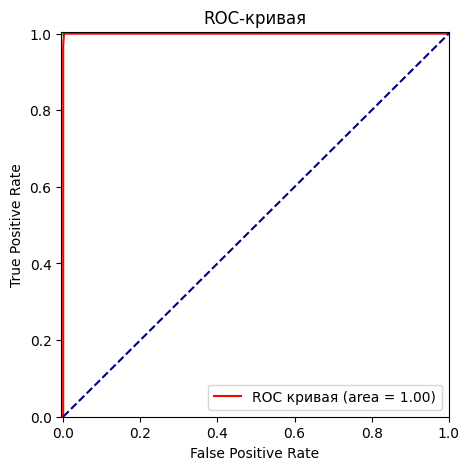

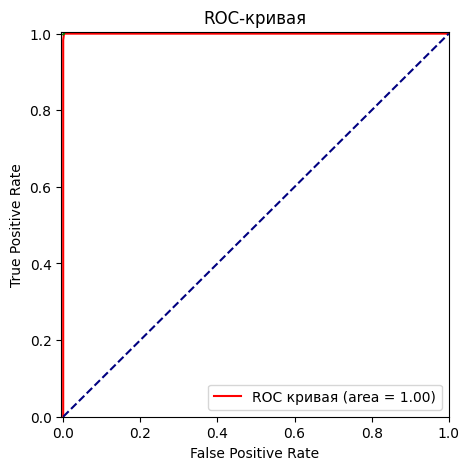

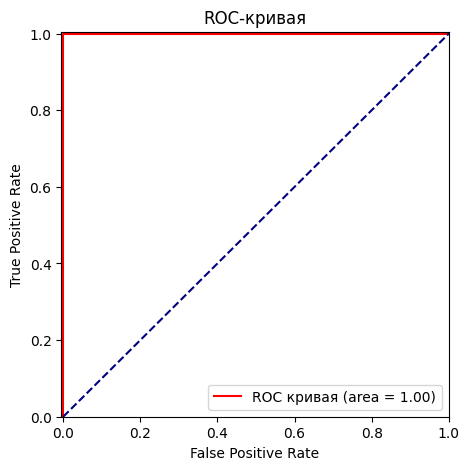

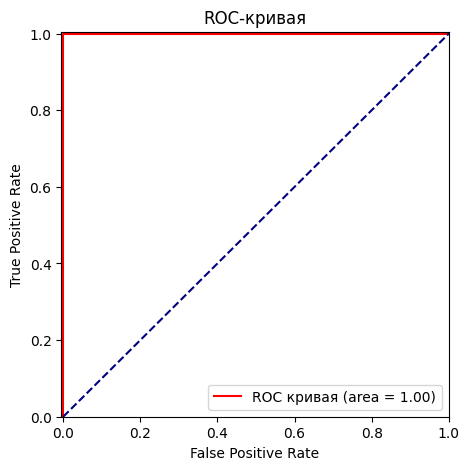

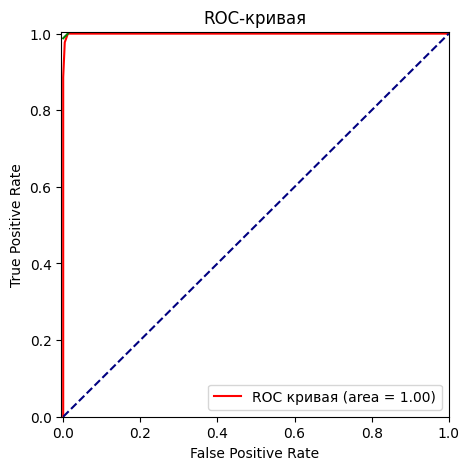

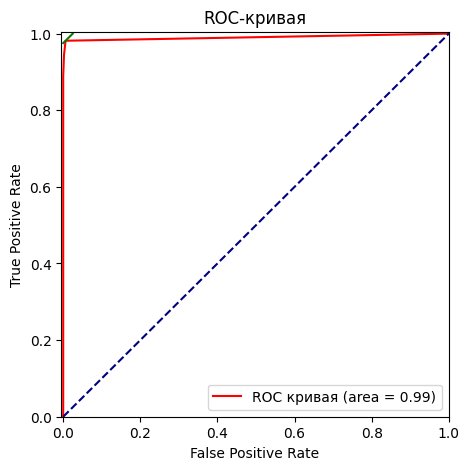

-----------------------------------------------------------------------


In [12]:
# Возьмем блок кода из задания 2, где мы работали со встроенным класом
data_arr = [datasets.load_breast_cancer, datasets.load_iris, datasets.load_wine, datasets.load_digits]
print("Iris plants dataset - Набор данных о растениях ириса\nWine recognition dataset - Набор данных для распознавания вин\nBreast cancer wisconsin (diagnostic) dataset - Набор данных по раку молочной железы в Висконсине (диагностический)\nOptical recognition of handwritten digits dataset - Оптическое распознавание набора данных рукописных цифр")
print ("------------------------------------------------------------------------")
# названия функций датасетов для оптимизационного вывода через цикл
metrics = ["minkowski","chebyshev","manhattan"] # Названия метрик
for dataset in data_arr:                     # Цикл прогона по 4 датасетам
  data = dataset()                              # Присвоение переменной data набор данных определенного датасета

  # атрибут DESCR - это строковая переменная или объект, которая, предположительно, содержит несколько строк текста.
  #.splitlines() - это метод строкового объекта, который разбивает строку на список строк, используя символы новой строки (перевода строки) в качестве разделителя.
  # [2] - это индексация списка, которая выбирает третью строку (от 0, поэтому [2] выберет третий элемент).
  # Результат заносится в переменную dataset_name и выводится
  dataset_name = data.DESCR.splitlines()[2]     # атрибут DESCR содержит описание датасета, которое включает его имя.
  print("Название датасета: ",dataset_name)
  # разделим данные с помощью train_test_split
  X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size = 0.7)
  # train - тренировка, test - проверка; 70% - тренировка (уйдет на обучение машины), оставшиеся 30% - тестирование (проверка результатов обучения машины)
  best_data = ["minkowski",3]               # Массив со значениями по-умолчанию лучших значений в метрике
  best_accuracy = 0                         # Значение точности по-умолчанию
  accuracy_arr = 15*[0]                         # инициализируем массив accuracy_arr точностей попадания в нужный класс
  a = 0                                         # инициализируем переменную а нулевым значением
  for j in metrics:                             # Цикл прогона по 3 метрикам
    print(" Метрика - ",j)                      # Название текущей метрики
    best_n_in_metric = 3                        # Лучшее количество соседей по-умолчанию
    best_accuracy_in_metric = 0             # Лучшая точность в метрике по-умолчанию
    for i in range(3,8):                        # Цикл прогона от 3 до 7 соседей включительно
      knn = KNeighborsClassifier(n_neighbors = i,metric = j)
      # Использую встроенный в sklearn класс k ближайших соседей с заданными числом соседей и метрикой
      knn.fit(X_train,y_train)               # Обучение модели по тренировочным значениям
      # прогнозирование переменной на основе обученной модели машинного обучения
      accuracy = (1-np.sum(np.abs(knn.predict(X_test)-y_test))/y_test.size)*100
      # Определяю точность попадания в нужный класс
      accuracy_arr[a] = accuracy # присваиваем элементам дефолтного массива точности, которыеполучаем при помощи раннее написанной функции predict(X_test)
      a +=1 # увеличиваем индекс, когда прибавляем элемент
      # Ищем лучшую точность (максимальную) и сохраняем точность в метрике и число соседей
      if accuracy > best_accuracy_in_metric:
        best_accuracy_in_metric = accuracy
        best_n_in_metric = i
      # цикл по определению лучших точности и числа соседей в метрике
      print("  Точность при ",i, "соседях: ",round(accuracy,3), "%")
      # Вывод точности при определнных кол-ве соседей и метрике
      # print(knn.predict_proba(X_test))      # вероятность принадлежности/непринадлежности к опр. классу
    # Ищем лучший результат точности в датасете (наибольшая точность из всех 15 вариантов), метрику в которой встречается первый раз и сколько всего раз встречается эта точность
    if best_accuracy_in_metric > best_accuracy:
      best_accuracy = best_accuracy_in_metric
      best_data[0] = j # Метрика,в которой впервые выявлена лучшая точность
      best_data[1] = best_n_in_metric # кол-во соседей при котором впервые выявлена лучшая точность в метрике the_best_data[0]
    # Цикл по определению лучших точности и числа соседей в датасете
    sum_b = 0
    for b in accuracy_arr:
      if b == best_accuracy:
        sum_b += 1 # кол-во раз, когда встречается лучшая точность
  print(" ")
  print("Вывод: Лучший результат в данном датасете равен ",round(best_accuracy,3),"%. Встречается", sum_b ," раз(а), впервые выявлен при метрике ",best_data[0], " и ",best_data[1], " соседях")
  print("-----------------------------------------------------------------------")

  # Далее новый блок кода для задания 3
  for target in range(len(np.unique(data.target))):
    # цикл создания roc auc кривых по кол-ву уникальных значений в data.target (метках)
    # np.unique() - создаёт множество из уникальных значений, len() - считает длину этого множества
    knn = KNeighborsClassifier(n_neighbors = best_data[1],metric = best_data[0])
    # Использую встроенный класс k ближайших соседей с лучшими числом соседей и метрикой
    knn.fit(X_train,y_train)     # Обучаю модель по лучшим значениям
    # по сути происходит сравнение массива тестовых у с массивом меток. В завсисимости от соблюдения или несоблюдения ставим 1 или ноль по всему y_test
    y = np.where(y_test == target, np.ones(y_test.shape), np.zeros(y_test.shape))
    # where() делает установку значений при соблюдении условий (условия, истина, ложь)
     # Создание массива y, где 1 соответствует текущему классу, а все остальные метки - 0.
    y_p = knn.predict_proba(X_test)[:,target]
    # Получение вероятностей принадлежности к текущему классу для тестовых данных.
    # print(y_p)
    fpr, tpr, treshold = roc_curve(y,y_p)
    # Вычисление значений False Positive Rate (FPR) и True Positive Rate (TPR) для ROC кривой.
    roc_auc = auc(fpr, tpr)
    # Вычисление площади под ROC кривой (ROC-AUC) для текущей метки k.
    plt.rcParams.update({'figure.figsize': (5, 5)})
    # Установка размера графика.
    plt.plot(fpr, tpr, color='red', label='ROC кривая (area = %0.2f)' % roc_auc) # считаем площадь под красной линией - определяем на сколько идеальный наш результат
    # Построение ROC кривой с соответствующей площадью под кривой (area).
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    # Построение диагональной линии для случайного классификатора (без информации).
    plt.plot([0, 1-max(tpr - fpr)], [max(tpr - fpr), 1.], color='g', linestyle='-')
    # Построение линии, представляющей идеальный классификатор (все верно классифицированные объекты).
    #То есть чем ближе к голубой пунктирной линии, тем менее идеальный классификатор мы имеем
    plt.xlim([-0.005, 1.0])
    plt.ylim([0.0, 1.005])
    # Установка пределов осей X и Y.
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # Установка подписей осей X и Y.
    plt.title('ROC-кривая')           # Установка заголовка графика.
    plt.legend(loc="lower right")     # Добавление легенды
    plt.show()                        # Отображение построенной ROC кривой на графике.
  print("-----------------------------------------------------------------------")